## 3.2
### Task 1

In [13]:
test_data <- read.csv("https://stepic.org/media/attachments/course/129/fill_na_test.csv")

In [14]:
test_data

x_1,x_2,y
9,22,14
14,35,9
10,45,NA
6,35,NA
11,36,16
5,27,11
9,34,NA
6,25,NA
11,38,13
12,23,NA


In [35]:
nnans <- test_data[!is.na(test_data$y), c('x_1', 'x_2', 'y')]
all <- test_data[ , c('x_1', 'x_2', 'y')]

In [36]:
nnans

,x_1,x_2,y
1,9,22,14
2,14,35,9
5,11,36,16
6,5,27,11
9,11,38,13


In [37]:
fit <- lm(y ~ x_1 + x_2, nnans)
fit


Call:
lm(formula = y ~ x_1 + x_2, data = nnans)

Coefficients:
(Intercept)          x_1          x_2  
   12.77542     -0.14188      0.03935  


In [38]:
predict.lm(fit, all)

1        2        3        4        5        6        7        8 
12.36414 12.16625 13.12727 13.30132 12.63125 13.12841 12.83632 12.90783 
       9       10 
12.70995 11.97784

In [55]:
nan <- is.na(test_data$y)
res <- nan * predict.lm(fit, all) + 
    ifelse(is.na(test_data$y), 0, test_data$y)
res

1        2        3        4        5        6        7        8 
14.00000  9.00000 13.12727 13.30132 16.00000 11.00000 12.83632 12.90783 
       9       10 
13.00000 11.97784

In [61]:
fill_na <- function(x){
    nnans <- x[!is.na(x$y), ]
    
    fit <- lm(y ~ x_1 + x_2, nnans)
    
    pred <- predict.lm(fit, x)
    
    nan <- is.na(x$y)
    res <- nan * predict.lm(fit, x) + ifelse(is.na(x$y), 0, x$y)
    
    x$y_full <- res
    
    x
}

In [62]:
fill_na(test_data)

x_1,x_2,y,y_full
9,22,14,14.00000
14,35,9,9.00000
10,45,NA,13.12727
6,35,NA,13.30132
11,36,16,16.00000
5,27,11,11.00000
9,34,NA,12.83632
6,25,NA,12.90783
11,38,13,13.00000
12,23,NA,11.97784


### Task 2

In [79]:
df <- mtcars[ , c('wt', 'mpg', 'disp', 'drat', 'hp')]
head(df, 5)

,wt,mpg,disp,drat,hp
Mazda RX4,2.620,21.0,160,3.90,110
Mazda RX4 Wag,2.875,21.0,160,3.90,110
Datsun 710,2.320,22.8,108,3.85,93
Hornet 4 Drive,3.215,21.4,258,3.08,110
Hornet Sportabout,3.440,18.7,360,3.15,175


In [80]:
model <- lm(wt ~ mpg, df)
model


Call:
lm(formula = wt ~ mpg, data = df)

Coefficients:
(Intercept)          mpg  
     6.0473      -0.1409  


In [81]:
install.packages('PerformanceAnalytics')
library(PerformanceAnalytics)

Installing package into ‘/home/nizhikebinesi/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend



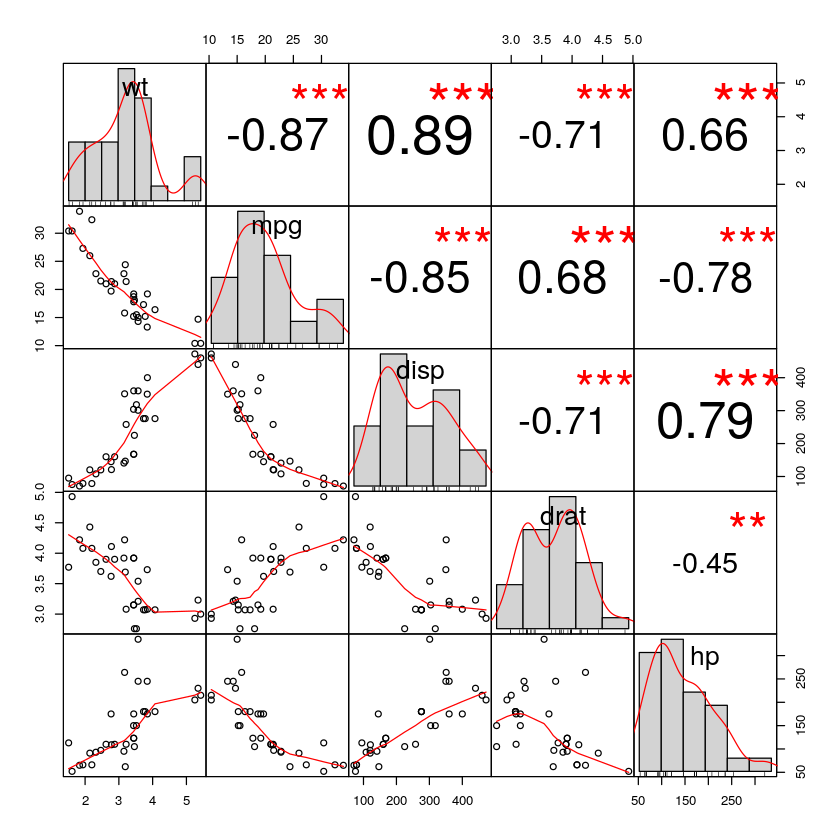

In [82]:
# code from https://stepik.org/lesson/11509/step/6?discussion=487167&unit=2532
library(PerformanceAnalytics)
chart.Correlation(df)

In [83]:
# install.packages('gtools')
# library(gtools)
features = c('mpg', 'disp', 'drat', 'hp')

In [84]:
length(features)

[1] 4

In [97]:
features = c('mpg', 'disp', 'drat', 'hp')
max <- 0
for (size in 1:length(features)) {
    comb <- combn(features, size, simplify = FALSE)
    for (size1 in 1:length(comb)) {
        comb1 <- comb[[size1]]
        s0 <- paste0(unlist(comb1), collapse = ' + ')
        s <- paste("wt ~ ", s0, sep='')
        
        fit <- lm(s, df)
        rs <- summary(fit)$adj.r.square
        
        if (rs > max) {
            max = rs
            model = fit
        }
        cat(s0, rs, "\n")
    }
}
cat(max, "\n")
print(fit)

mpg 0.7445939 
disp 0.7814586 
drat 0.4911574 
hp 0.4150804 
mpg + disp 0.8241596 
mpg + drat 0.7651865 
mpg + hp 0.736368 
disp + drat 0.7883499 
disp + hp 0.7793499 
drat + hp 0.6274661 
mpg + disp + drat 0.8235929 
mpg + disp + hp 0.8428136 
mpg + drat + hp 0.7568336 
disp + drat + hp 0.7827684 
mpg + disp + drat + hp 0.8374193 
0.8428136 

Call:
lm(formula = s, data = df)

Coefficients:
(Intercept)          mpg         disp         drat           hp  
   4.364821    -0.079981     0.005085    -0.054984    -0.003519  



### Question 1

In [99]:
head(attitude, 5)

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47


In [102]:
fit <- lm(rating ~ complaints * critical, data = attitude)
summary(fit)


Call:
lm(formula = rating ~ complaints * critical, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1988  -6.2054   0.3718   6.1426   9.6796 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
(Intercept)         26.923536  41.643872   0.647    0.524
complaints           0.551382   0.649862   0.848    0.404
critical            -0.181353   0.595686  -0.304    0.763
complaints:critical  0.002907   0.009192   0.316    0.754

Residual standard error: 7.243 on 26 degrees of freedom
Multiple R-squared:  0.6825,	Adjusted R-squared:  0.6459 
F-statistic: 18.63 on 3 and 26 DF,  p-value: 1.169e-06


### Questions 2 and 3

In [104]:
mtcars$am <- factor(mtcars$am, labels = c('Automatic', 'Manual'))
head(mtcars, 3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,Manual,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,Manual,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,Manual,4,1


In [105]:
fit <- lm(mpg ~ wt * am, data = mtcars)
summary(fit)


Call:
lm(formula = mpg ~ wt * am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6004 -1.5446 -0.5325  0.9012  6.0909 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.4161     3.0201  10.402 4.00e-11 ***
wt           -3.7859     0.7856  -4.819 4.55e-05 ***
amManual     14.8784     4.2640   3.489  0.00162 ** 
wt:amManual  -5.2984     1.4447  -3.667  0.00102 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.591 on 28 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8151 
F-statistic: 46.57 on 3 and 28 DF,  p-value: 5.209e-11


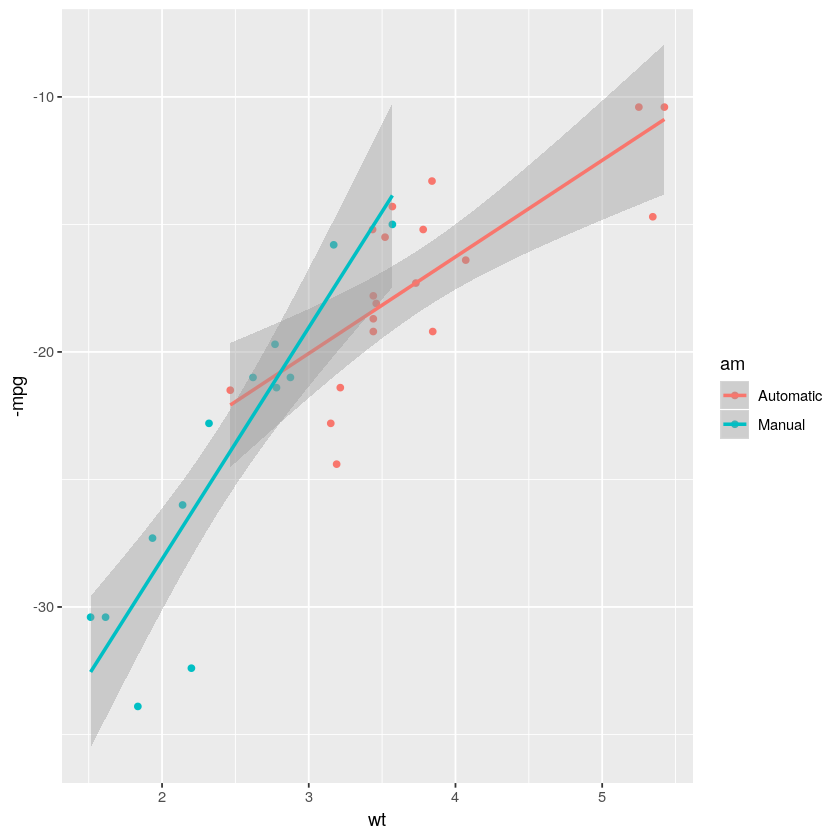

In [109]:
library(ggplot2)
ggplot(mtcars, aes(x = wt, y = -mpg, col = am)) +
    geom_point() +
    geom_smooth(method = 'lm')